In [1]:
# Import charting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# Import data managment libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
## Imoprt function 
#from data_uploader_from_csv.ipynb import data_uploader

In [14]:
%matplotlib inline
sns.set()

In [33]:
df = pd.read_csv('CDC_data.csv')
df.head()

,person#,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,height_cm,weight_kg,wtdesire_kg
0,1,good,0,1,0,70,175,175,77,m,177.80,79.378600,79.378600
1,2,good,0,1,1,64,125,115,33,f,162.56,56.699000,52.163080
2,3,good,1,1,1,60,105,105,49,f,152.40,47.627160,47.627160
3,4,good,1,1,0,66,132,124,42,f,167.64,59.874144,56.245408
4,5,very good,0,1,0,61,150,130,55,f,154.94,68.038800,58.966960


In [9]:
df = df.drop(['height', 'weight', 'wtdesire'], axis=1)

In [11]:
df['weight_kg'].describe()

count    20000.000000
mean        76.966829
std         18.180407
min         30.844256
25%         63.502880
50%         74.842680
75%         86.182480
max        226.796000
Name: weight_kg, dtype: float64

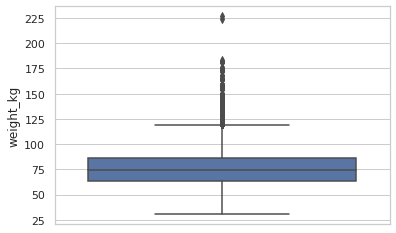

In [16]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=df["weight_kg"])
plt.savefig('wieght_box.png')

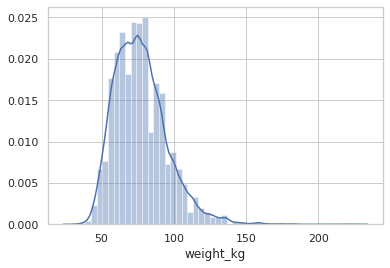

In [23]:
sns.distplot(df["weight_kg"])
plt.savefig('wieght_distr.png')

/home/azamatuz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.


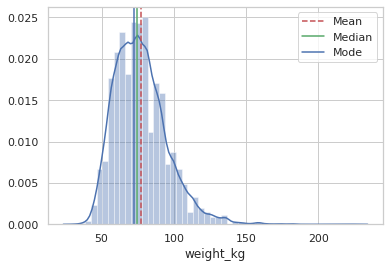

In [29]:
f, (ax_hist) = plt.subplots(sharex=True,)
mean=df['weight_kg'].mean()
median=df['weight_kg'].median()
mode=df['weight_kg'].mode().get_values()[0]

sns.distplot(df["weight_kg"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.savefig('wieght_distr.png')
plt.show()

In [44]:
df.groupby('weight')

person#                 genhlth             exerany           hlthplan  \
           min    max count        min   max count     min max count      min   
weight                                                                          
68       18743  18743     1       good  good     1       1   1     1        1   
70       16531  16531     1       good  good     1       1   1     1        1   
78       11299  18065     2       fair  fair     2       0   0     2        1   
79        7614   7614     1       poor  poor     1       0   0     1        1   
80        1319  15673     2       fair  poor     2       0   1     2        1   
...        ...    ...   ...        ...   ...   ...     ...  ..   ...      ...   
390      13177  13177     1       poor  poor     1       0   0     1        1   
400        861  19319     5  excellent  poor     5       0   1     5        0   
405      15720  15720     1       poor  poor     1       1   1     1        1   
495       4445   4445     1       fair  fair     1       1   1     1        1   
500       1995   1995     1       poor  poor     1       1   1     1        1   

        ... gender height_cm                 weight_kg                    \
        ...  count       min     max count         min         max count   
weight  ...                                                                
68      ...      1    132.08  132.08     1   30.844256   30.844256     1   
70      ...      1    149.86  149.86     1   31.751440   31.751440     1   
78      ...      2    160.02  162.56     2   35.380176   35.380176     2   
79      ...      1    167.64  167.64     1   35.833768   35.833768     1   
80      ...      2    157.48  160.02     2   36.287360   36.287360     2   
...     ...    ...       ...     ...   ...         ...         ...   ...   
390     ...      1    175.26  175.26     1  176.900880  176.900880     1   
400     ...      5    170.18  203.20     5  181.436800  181.436800     5   
405     ...      1    172.72  172.72     1  183.704760  183.704760     1   
495     ...      1    175.26  175.26     1  224.528040  224.528040     1   
500     ...      1    187.96  187.96     1  226.796000  226.796000     1   

       wtdesire_kg                    
               min         max count  
weight                                
68       30.844256   30.844256     1  
70       40.823280   40.823280     1  
78       45.359200   47.627160     2  
79       54.431040   54.431040     1  
80       45.359200   49.895120     2  
...            ...         ...   ...  
390      86.182480   86.182480     1  
400      86.182480  127.005760     5  
405      77.110640   77.110640     1  
495      88.450440   88.450440     1  
500      90.718400   90.718400     1  

[237 rows x 36 columns]

In [68]:
group_wight = pd.DataFrame(df['weight'].groupby(df['weight']).count())
group_wight['count'] = group_wight.values

In [73]:
group_wight = group_wight.drop('weight', axis=1)

In [81]:
group_wight.index

Int64Index([ 68,  70,  78,  79,  80,  82,  83,  84,  85,  86,
            ...
            364, 370, 371, 380, 385, 390, 400, 405, 495, 500],
           dtype='int64', name='weight', length=237)

In [86]:
group_wight[group_wight.index <= 167].sum()

count    10355
dtype: int64

In [87]:
10355*100/20000

51.775